# pandas란?
---

pandas는 파이썬에서 사용하는 오픈소스 데이터 분석 라이브러리입니다.

오늘은 pandas 공식 홈페이지의 [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#minutes-to-pandas) 튜토리얼을 보고 대략적인 사용법을 익혀보겠습니다.

우선 필요한 라이브러리를 import 합니다.

In [1]:
import numpy as np
import pandas as pd

# Object creation
---

pandas에서 주로 사용되는 Series와 Dataframe을 생성해보겠습니다.

우선 Series를 생성해봅시다.

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

date_range()를 통해 날짜 데이터를 생성하고, 해당 데이터를 index 삼아 DataFrame을 생성해봅시다.

data는 numpy의 randn 함수를 통해 생성합니다.

In [3]:
dates = pd.date_range("20130101", periods=6)
dates
df = pd.DataFrame(data=np.random.randn(6,4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.385872,0.545331,-0.464414,-0.275571
2013-01-02,1.499289,-0.731638,0.534918,0.777084
2013-01-03,0.814015,0.518597,1.127680,1.532451
2013-01-04,0.841244,-0.591366,0.251556,0.112023
2013-01-05,-0.006827,-0.195435,-0.874399,-1.297010
2013-01-06,-1.216484,0.578059,-0.938828,-0.567009


dictionary 형태의 데이터를 이용해 DataFrame을 생성했습니다.

In [4]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


각 columns은 서로 다른 dtype을 가지고 있는 것을 확인할 수 있습니다.

In [5]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# Viewing data
---

head()와 tail()을 통해 df의 맨 위와 아랫부분을 살펴볼 수 있습니다.

In [6]:
df.head()

,A,B,C,D
2013-01-01,-0.385872,0.545331,-0.464414,-0.275571
2013-01-02,1.499289,-0.731638,0.534918,0.777084
2013-01-03,0.814015,0.518597,1.127680,1.532451
2013-01-04,0.841244,-0.591366,0.251556,0.112023
2013-01-05,-0.006827,-0.195435,-0.874399,-1.297010


In [7]:
df.tail(3)

,A,B,C,D
2013-01-04,0.841244,-0.591366,0.251556,0.112023
2013-01-05,-0.006827,-0.195435,-0.874399,-1.297010
2013-01-06,-1.216484,0.578059,-0.938828,-0.567009


df의 index와 columns를 확인해봅시다.

In [8]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [9]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

to_numpy() 함수를 통해 DataFrame을 numpy array로 변환할 수 있습니다. 변환한 array에는 index와 columns은 포함되지 않습니다.

numpy array의 데이터 타입은 한 가지로 이루어져 있기 떄문에, 변환하고자 하는 DataFrame의 columns의 데이터 타입이 여러 가지라면, 모든 타입을 포함할 수 있는 최적의 데이터 타입으로 변환해줍니다.

그러나, 다중 타입을 가진 Dataframe 변환은 단일 타입의 Dataframe을 변환할 때보다 더 많은 시간과 자원을 소모한다는 단점이 있습니다.

In [10]:
df.to_numpy()

array([[-0.3858718 ,  0.54533098, -0.46441403, -0.27557113],
       [ 1.49928916, -0.73163751,  0.53491816,  0.77708421],
       [ 0.8140149 ,  0.51859729,  1.12767962,  1.53245061],
       [ 0.84124432, -0.59136571,  0.2515561 ,  0.11202285],
       [-0.00682728, -0.19543545, -0.87439941, -1.29700995],
       [-1.21648411,  0.57805906, -0.93882751, -0.56700852]])

In [11]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

describe()는 데이터의 간단한 통계 정보를 보여줍니다.

In [12]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.257561,0.020591,-0.060581,0.046995
std,0.984777,0.603513,0.831951,1.003119
min,-1.216484,-0.731638,-0.938828,-1.297010
25%,-0.291111,-0.492383,-0.771903,-0.494149
50%,0.403594,0.161581,-0.106429,-0.081774
75%,0.834437,0.538648,0.464078,0.610819
max,1.499289,0.578059,1.127680,1.532451


데이터의 rows와 columns을 바꾸는 방법입니다.

In [13]:
df.T # == df.transpose()

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.385872,1.499289,0.814015,0.841244,-0.006827,-1.216484
B,0.545331,-0.731638,0.518597,-0.591366,-0.195435,0.578059
C,-0.464414,0.534918,1.127680,0.251556,-0.874399,-0.938828
D,-0.275571,0.777084,1.532451,0.112023,-1.297010,-0.567009


DataFrame.sort_index()로 index를 기준으로 데이터를 정렬할 수 있습니다.

axis가 0이면 row를, 1이면 column을 기준으로 변경해줍니다.

ascending은 오름차순 정렬 인자입니다.

In [14]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.275571,-0.464414,0.545331,-0.385872
2013-01-02,0.777084,0.534918,-0.731638,1.499289
2013-01-03,1.532451,1.127680,0.518597,0.814015
2013-01-04,0.112023,0.251556,-0.591366,0.841244
2013-01-05,-1.297010,-0.874399,-0.195435,-0.006827
2013-01-06,-0.567009,-0.938828,0.578059,-1.216484


DataFrame.sort_values()는 index의 값을 기준으로 데이터를 정렬합니다.

In [15]:
df.sort_values(by="B")

,A,B,C,D
2013-01-02,1.499289,-0.731638,0.534918,0.777084
2013-01-04,0.841244,-0.591366,0.251556,0.112023
2013-01-05,-0.006827,-0.195435,-0.874399,-1.297010
2013-01-03,0.814015,0.518597,1.127680,1.532451
2013-01-01,-0.385872,0.545331,-0.464414,-0.275571
2013-01-06,-1.216484,0.578059,-0.938828,-0.567009


In [16]:
df.sort_values(by="2013-01-01", axis=1)

,C,A,D,B
2013-01-01,-0.464414,-0.385872,-0.275571,0.545331
2013-01-02,0.534918,1.499289,0.777084,-0.731638
2013-01-03,1.127680,0.814015,1.532451,0.518597
2013-01-04,0.251556,0.841244,0.112023,-0.591366
2013-01-05,-0.874399,-0.006827,-1.297010,-0.195435
2013-01-06,-0.938828,-1.216484,-0.567009,0.578059


# Selection
---

pandas에서 특정 데이터를 select할 때는 DataFrame.at(), DataFrame.iat(), DataFrame.loc(), DataFrame.iloc()를 통해 가져오는 것을 권장한다고 합니다.

at()과 iat()는 단일 값(Scalar)만 가져올 수 있지만, loc()와 iloc()에 비해 더 빠른 속도를 가지고 있습니다.

## Getting
---

A열의 데이터를 Series형태로 가져옵니다.

In [17]:
df["A"]

2013-01-01   -0.385872
2013-01-02    1.499289
2013-01-03    0.814015
2013-01-04    0.841244
2013-01-05   -0.006827
2013-01-06   -1.216484
Freq: D, Name: A, dtype: float64

데이터를 슬라이싱 하는 방법도 가능합니다.

In [18]:
df[0:3]

,A,B,C,D
2013-01-01,-0.385872,0.545331,-0.464414,-0.275571
2013-01-02,1.499289,-0.731638,0.534918,0.777084
2013-01-03,0.814015,0.518597,1.127680,1.532451


In [19]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,1.499289,-0.731638,0.534918,0.777084
2013-01-03,0.814015,0.518597,1.127680,1.532451
2013-01-04,0.841244,-0.591366,0.251556,0.112023


## Selection by label

at()과 loc()를 통해 label로 데이터를 가져올 수 있습니다.

In [20]:
df.loc[dates[0]]

A   -0.385872
B    0.545331
C   -0.464414
D   -0.275571
Name: 2013-01-01 00:00:00, dtype: float64

loc()는 loc[rows조건, columns조건]의 형태로 데이터를 가져옵니다.

데이터를 가져오는 방법으로 슬라이싱도 가능하고, 원하는 부분만 리스트 형태로 가져오는 것도 가능합니다.

이때 주의할 점은, loc를 사용하여 슬라이싱을 할 때는 일반 슬라이싱과 달리 지정한 모든 범위가 포함됩니다.(범위의 맨 끝을 자르지 않음)

In [21]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-0.385872,0.545331
2013-01-02,1.499289,-0.731638
2013-01-03,0.814015,0.518597
2013-01-04,0.841244,-0.591366
2013-01-05,-0.006827,-0.195435
2013-01-06,-1.216484,0.578059


In [22]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,1.499289,-0.731638
2013-01-03,0.814015,0.518597
2013-01-04,0.841244,-0.591366


In [23]:
df.loc["20130102", ["A", "B"]]

A    1.499289
B   -0.731638
Name: 2013-01-02 00:00:00, dtype: float64

scalar 값을 가져올때는 at()도 사용 가능합니다.

In [24]:
df.loc[dates[0], "A"]

-0.3858717967415619

In [25]:
df.at[dates[0], "A"]

-0.3858717967415619

## Selection by position
---

원하는 부분의 index로 데이터를 가져오고 싶을때는 iloc()를 사용하면 됩니다.

In [26]:
df.iloc[3]

A    0.841244
B   -0.591366
C    0.251556
D    0.112023
Name: 2013-01-04 00:00:00, dtype: float64

In [27]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.841244,-0.591366
2013-01-05,-0.006827,-0.195435


In [28]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,1.499289,0.534918
2013-01-03,0.814015,1.127680
2013-01-05,-0.006827,-0.874399


In [29]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,1.499289,-0.731638,0.534918,0.777084
2013-01-03,0.814015,0.518597,1.127680,1.532451


In [30]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.545331,-0.464414
2013-01-02,-0.731638,0.534918
2013-01-03,0.518597,1.127680
2013-01-04,-0.591366,0.251556
2013-01-05,-0.195435,-0.874399
2013-01-06,0.578059,-0.938828


scalar 값을 가져올때는, iat()도 사용 가능합니다.

In [31]:
df.iloc[1, 1]

-0.7316375093488827

In [32]:
df.iat[1, 1]

-0.7316375093488827

## Boolean indexing
---

데이터를 가져올때, 특정 조건을 지정해줘서 가져오는 방법도 있습니다. 이것을 마스크를 지정한다고 표현합니다.

A 열의 값이 0보다 큰 row를 찾고, 해당하는 row의 전체를 반환합니다.

In [33]:
mask = df["A"] > 0
df[mask]

,A,B,C,D
2013-01-02,1.499289,-0.731638,0.534918,0.777084
2013-01-03,0.814015,0.518597,1.127680,1.532451
2013-01-04,0.841244,-0.591366,0.251556,0.112023


0보다 큰 값들로 마스크를 만들고, df 전체에 적용해 표시합니다.

In [34]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.545331,NaN,NaN
2013-01-02,1.499289,NaN,0.534918,0.777084
2013-01-03,0.814015,0.518597,1.127680,1.532451
2013-01-04,0.841244,NaN,0.251556,0.112023
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,NaN,0.578059,NaN,NaN


isin()은 문자 그대로 인자로 들어오는 인수가 데이터 안에 들어있는지 확인해주는 함수입니다.

In [35]:
df2 = df.copy() # 깊은 복사
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,-0.385872,0.545331,-0.464414,-0.275571,one
2013-01-02,1.499289,-0.731638,0.534918,0.777084,one
2013-01-03,0.814015,0.518597,1.127680,1.532451,two
2013-01-04,0.841244,-0.591366,0.251556,0.112023,three
2013-01-05,-0.006827,-0.195435,-0.874399,-1.297010,four
2013-01-06,-1.216484,0.578059,-0.938828,-0.567009,three


In [36]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,0.814015,0.518597,1.127680,1.532451,two
2013-01-05,-0.006827,-0.195435,-0.874399,-1.297010,four


## Setting
---

DataFrame에 새 column을 추가하면, 기존 데이터의 index에 맞춰 자동으로 데이터가 추가됩니다.

In [37]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [38]:
df["F"] = s1
df

,A,B,C,D,F
2013-01-01,-0.385872,0.545331,-0.464414,-0.275571,NaN
2013-01-02,1.499289,-0.731638,0.534918,0.777084,1.0
2013-01-03,0.814015,0.518597,1.127680,1.532451,2.0
2013-01-04,0.841244,-0.591366,0.251556,0.112023,3.0
2013-01-05,-0.006827,-0.195435,-0.874399,-1.297010,4.0
2013-01-06,-1.216484,0.578059,-0.938828,-0.567009,5.0


데이터의 특정 부분만 변경하는 것도 가능합니다.

In [39]:
df.at[dates[0], "A"] = 0

In [40]:
df.iat[0, 1] = 0

In [41]:
df.loc[:, "D"] = np.array([5] * len(df))

C:\Users\sunse\AppData\Local\Temp\ipykernel_14420\2422562958.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "D"] = np.array([5] * len(df))


In [42]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.464414,5,NaN
2013-01-02,1.499289,-0.731638,0.534918,5,1.0
2013-01-03,0.814015,0.518597,1.127680,5,2.0
2013-01-04,0.841244,-0.591366,0.251556,5,3.0
2013-01-05,-0.006827,-0.195435,-0.874399,5,4.0
2013-01-06,-1.216484,0.578059,-0.938828,5,5.0


0보다 큰 값들만 마스킹해 음수로 변경합니다.

In [43]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.464414,-5,NaN
2013-01-02,-1.499289,-0.731638,-0.534918,-5,-1.0
2013-01-03,-0.814015,-0.518597,-1.127680,-5,-2.0
2013-01-04,-0.841244,-0.591366,-0.251556,-5,-3.0
2013-01-05,-0.006827,-0.195435,-0.874399,-5,-4.0
2013-01-06,-1.216484,-0.578059,-0.938828,-5,-5.0


# Missiong data
---

reindex()를 사용하여 index와 columns을 추가/변경/삭제 할 수 있습니다.

In [44]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.464414,5,NaN,1.0
2013-01-02,1.499289,-0.731638,0.534918,5,1.0,1.0
2013-01-03,0.814015,0.518597,1.127680,5,2.0,NaN
2013-01-04,0.841244,-0.591366,0.251556,5,3.0,NaN


dropna()는 결측치(NaN)가 있는 모든 row를 삭제합니다. how 인자를 통해 여러가지 조건을 설정할 수 있습니다.

In [45]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,1.499289,-0.731638,0.534918,5,1.0,1.0


결측치를 특정 값으로 채워넣을 수 있습니다.

In [46]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.464414,5,5.0,1.0
2013-01-02,1.499289,-0.731638,0.534918,5,1.0,1.0
2013-01-03,0.814015,0.518597,1.127680,5,2.0,5.0
2013-01-04,0.841244,-0.591366,0.251556,5,3.0,5.0


해당 위치의 결측치 여부를 반환합니다.

In [47]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operations
---

## Stats
---

일반적으로 결측치는 각종 통계를 낼 때 제외되고 계산됩니다.

mean()으로 각 columns의 평균을 계산합니다.

In [48]:
df.mean()

A    0.321873
B   -0.070297
C   -0.060581
D    5.000000
F    3.000000
dtype: float64

rows의 평균을 계산합니다.

In [49]:
df.mean(axis=1)

2013-01-01    1.133896
2013-01-02    1.460514
2013-01-03    1.892058
2013-01-04    1.700287
2013-01-05    1.584668
2013-01-06    1.684549
Freq: D, dtype: float64

sub()로 뺄샘을 수행할 수 있습니다. 계산할 수 없는 부분은 결측치를 반환합니다.

In [50]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [51]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.185985,-0.481403,0.127680,4.0,1.0
2013-01-04,-2.158756,-3.591366,-2.748444,2.0,0.0
2013-01-05,-5.006827,-5.195435,-5.874399,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply
---

apply()는 사용자가 정의한 함수를 데이터에 적용시킵니다.

In [52]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.464414,5,NaN
2013-01-02,1.499289,-0.731638,0.070504,10,1.0
2013-01-03,2.313304,-0.213040,1.198184,15,3.0
2013-01-04,3.154548,-0.804406,1.449740,20,6.0
2013-01-05,3.147721,-0.999841,0.575340,25,10.0
2013-01-06,1.931237,-0.421782,-0.363487,30,15.0


In [53]:
df.apply(lambda x: x.max() - x.min())

A    2.715773
B    1.309697
C    2.066507
D    0.000000
F    4.000000
dtype: float64

## Histogramming

value_count()로 각 변수의 총 개수를 확인할 수 있습니다.

In [54]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    3
1    2
2    1
3    6
4    6
5    1
6    2
7    2
8    6
9    0
dtype: int32

In [55]:
s.value_counts()

2    3
6    3
1    2
3    1
0    1
dtype: int64

## String Methods
---

str Series는 아래처럼 각 요소들에 쉬운 문자열 처리가 가능합니다.

In [56]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge
---

데이터를 합치는 방법은 concat()과 merge()로 두 가지 방법이 있습니다.

## Concat
---

concat()은 단순히 데이터를 합쳐주는 함수입니다.

In [57]:
df = pd.DataFrame(np.random.randn(10,4))

In [58]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.166254  0.554291  0.410789 -0.703798
 1  1.404141 -0.838277 -0.746924 -0.666178
 2  1.724893  0.331973  1.899315  1.328288,
           0         1         2         3
 3  0.540279 -0.278775  1.839450 -0.160652
 4  0.365600 -1.197572  0.796456  1.617403
 5  0.453599 -0.923256  0.466835  0.913805
 6 -1.191743  0.759431 -0.208684 -0.260343,
           0         1         2         3
 7  1.000668  1.000996 -0.530937  1.383965
 8  0.934609 -0.479983  0.556365  0.540123
 9  0.292210 -1.218297  0.205873  0.051380]

In [59]:
pd.concat(pieces)

,0,1,2,3
0,0.166254,0.554291,0.410789,-0.703798
1,1.404141,-0.838277,-0.746924,-0.666178
2,1.724893,0.331973,1.899315,1.328288
3,0.540279,-0.278775,1.839450,-0.160652
4,0.365600,-1.197572,0.796456,1.617403
5,0.453599,-0.923256,0.466835,0.913805
6,-1.191743,0.759431,-0.208684,-0.260343
7,1.000668,1.000996,-0.530937,1.383965
8,0.934609,-0.479983,0.556365,0.540123
9,0.292210,-1.218297,0.205873,0.051380


## Join
---

merge()를 사용하면 공통된 항목을 기준으로 데이터를 합칠 수 있습니다.

on 인자를 사용해 다양한 옵션을 줄 수 있습니다.

In [60]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
display(left)
display(right)
pd.merge(left, right, on="key")

,key,lval
0,foo,1
1,foo,2


,key,rval
0,foo,4
1,foo,5


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [61]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
display(left)
display(right)
pd.merge(left, right, on="key")

,key,lval
0,foo,1
1,bar,2


,key,rval
0,foo,4
1,bar,5


,key,lval,rval
0,foo,1,4
1,bar,2,5


# Grouping
---

groupby()는 다음과 같은 순서로 진행됩니다.

1. 지정한 기준에 따라 데이터를 분할합니다.
2. 분할된 데이터에 독립적으로 함수를 적용합니다.
3. 함수가 적용된 데이터를 한 테이블로 합쳐줍니다.

예를들어 `df.groupby("A").sum()`인 경우

1. 우선 "A"를 기준으로 데이터를 분할
2. 분할된 요소들에 각각 sum()을 적용
3. 마지막으로 한 테이블로 합쳐주는 것입니다.

In [62]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,1.670809,-1.019889
1,bar,one,1.333169,-0.701318
2,foo,two,0.744969,-0.017832
3,bar,three,0.697697,-1.357315
4,foo,two,-0.976023,0.474978
5,bar,two,0.750854,-1.789849
6,foo,one,1.083483,1.972045
7,foo,three,-0.907580,-2.059820


In [63]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,2.781720,-3.848482
foo,1.615658,-0.650519


In [64]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    1.333169 -0.701318
    three  0.697697 -1.357315
    two    0.750854 -1.789849
foo one    2.754292  0.952156
    three -0.907580 -2.059820
    two   -0.231054  0.457146

# Reshaping
---

## Stack

MultiIndex는 index가 두 가지 이상일때 사용하는 index입니다.

DataFrame을 stack()하면 columns이 index로 옮겨지고 Series형태의 데이터가 됩니다. 

In [65]:
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -1.699214 -1.634742
      two     0.415830 -0.483519
baz   one    -0.837533 -1.691972
      two    -0.265583 -1.359251

In [66]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.699214
               B   -1.634742
       two     A    0.415830
               B   -0.483519
baz    one     A   -0.837533
               B   -1.691972
       two     A   -0.265583
               B   -1.359251
dtype: float64

In [67]:
stacked.index

MultiIndex([('bar', 'one', 'A'),
            ('bar', 'one', 'B'),
            ('bar', 'two', 'A'),
            ('bar', 'two', 'B'),
            ('baz', 'one', 'A'),
            ('baz', 'one', 'B'),
            ('baz', 'two', 'A'),
            ('baz', 'two', 'B')],
           names=['first', 'second', None])

unstack()을 사용하여 stack된 데이터를 되돌릴 수 있습니다.

In [68]:
display(stacked.unstack())
display(stacked.unstack(1))
display(stacked.unstack(0))

A         B
first second                    
bar   one    -1.699214 -1.634742
      two     0.415830 -0.483519
baz   one    -0.837533 -1.691972
      two    -0.265583 -1.359251

second        one       two
first                      
bar   A -1.699214  0.415830
      B -1.634742 -0.483519
baz   A -0.837533 -0.265583
      B -1.691972 -1.359251

first          bar       baz
second                      
one    A -1.699214 -0.837533
       B -1.634742 -1.691972
two    A  0.415830 -0.265583
       B -0.483519 -1.359251

## Pivot tables
---

pivot_table()을 사용하면 원하는 데이터만 뽑아 새로운 테이블로 재구성할 수 있습니다.

In [69]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,-1.827595,-1.768435
1,one,B,foo,-1.218198,-0.011734
2,two,C,foo,0.145742,-0.098303
3,three,A,bar,-0.177890,0.281195
4,one,B,bar,2.246272,-0.056162
5,one,C,bar,-1.598140,-2.092840
6,two,A,foo,-1.923455,-0.389509
7,three,B,foo,1.120105,-0.019353
8,one,C,foo,-1.030409,1.344342
9,one,A,bar,0.959791,-0.931359


In [70]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.959791 -1.827595
      B  2.246272 -1.218198
      C -1.598140 -1.030409
three A -0.177890       NaN
      B       NaN  1.120105
      C  1.741607       NaN
two   A       NaN -1.923455
      B -0.407101       NaN
      C       NaN  0.145742

# Time series
---

pandas에서는 시계열 데이터를 쉽게 변환할 수 있습니다.

예를들어, 1초 단위의 시계열 데이터를 resample("1Min")로 1분 단위의 데이터로 묶어줄 수 있습니다.

In [71]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("1Min").sum()

2012-01-01 00:00:00    15945
2012-01-01 00:01:00     9912
Freq: T, dtype: int32

tz_localize()로 시계열 데이터를 표준 시간대로 바꿔줄 수 있습니다.

In [72]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.965389
2012-03-07    0.225107
2012-03-08    1.107277
2012-03-09    0.416878
2012-03-10   -0.933407
Freq: D, dtype: float64

In [73]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00    0.965389
2012-03-07 00:00:00+00:00    0.225107
2012-03-08 00:00:00+00:00    1.107277
2012-03-09 00:00:00+00:00    0.416878
2012-03-10 00:00:00+00:00   -0.933407
Freq: D, dtype: float64

tz_convert()로 시계열 데이터를 다른 국가의 표준 시간대로 변경할 수 있습니다.

In [74]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00    0.965389
2012-03-06 19:00:00-05:00    0.225107
2012-03-07 19:00:00-05:00    1.107277
2012-03-08 19:00:00-05:00    0.416878
2012-03-09 19:00:00-05:00   -0.933407
Freq: D, dtype: float64

시간 표현 범위를 쉽게 변경할 수 있습니다.

In [75]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.620428
2012-02-29   -1.421264
2012-03-31   -0.379466
2012-04-30   -0.243900
2012-05-31   -0.804306
Freq: M, dtype: float64

In [76]:
ps = ts.to_period()
ps

2012-01   -0.620428
2012-02   -1.421264
2012-03   -0.379466
2012-04   -0.243900
2012-05   -0.804306
Freq: M, dtype: float64

In [77]:
ps.to_timestamp()

2012-01-01   -0.620428
2012-02-01   -1.421264
2012-03-01   -0.379466
2012-04-01   -0.243900
2012-05-01   -0.804306
Freq: MS, dtype: float64

시계열 데이터에 연산자를 사용할 수 있습니다.

asfreq()는 시간을 원하는 주기로 나눠줍니다.

In [78]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00   -1.811058
1990-06-01 09:00    1.632052
1990-09-01 09:00   -0.807591
1990-12-01 09:00   -0.356787
1991-03-01 09:00   -1.136469
Freq: H, dtype: float64

# Categoricals
---

pandas에는 categorical 형태의 데이터타입이 존재합니다.

categorical 데이터는 object 형태의 데이터와는 다르게 데이터의 순서가 존재합니다.

In [79]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [80]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

카테고리 데이터의 이름을 바꿔봤습니다.

In [81]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)

set_categories()로 카테고리의 요소를 추가하고, 순서를 재설정 했습니다.

In [82]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

정해진 순서에 따라 데이터가 정렬됩니다.

In [83]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


데이터를 그룹화 하면 빈 카테고리 요소도 표시됩니다.

In [84]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting
---

matplotlib를 사용하여 그래프를 그릴 수 있습니다.

In [85]:
import matplotlib.pyplot as plt

plt.close("all")

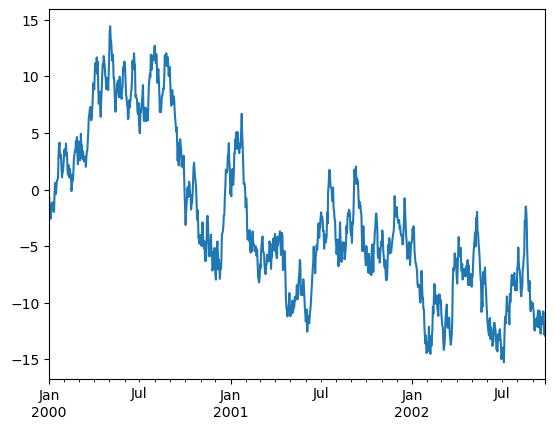

In [86]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

In [87]:
plt.show();

<Figure size 640x480 with 0 Axes>

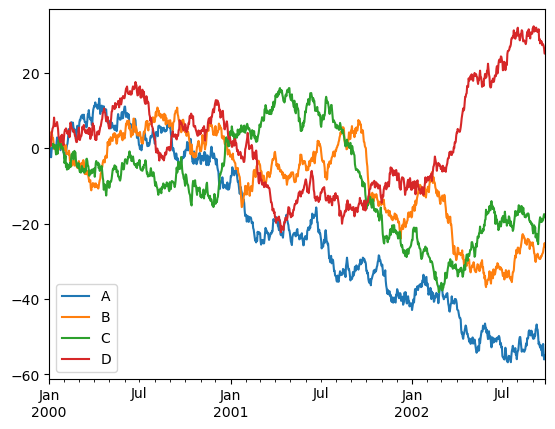

In [88]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

# Importing and exporting data
---

작업한 데이터를 여러 형태로 저장하거나 불러올 수 있습니다.

## CSV

In [89]:
df.to_csv("foo.csv")
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.424971,0.237717,-0.128266,0.478696
1,2000-01-02,-0.132441,0.287681,0.004313,1.661224
2,2000-01-03,-1.285151,2.429696,0.540267,2.224504
3,2000-01-04,-0.316639,2.815068,0.784963,0.573326
4,2000-01-05,-2.403560,2.111531,1.299099,1.451050
...,...,...,...,...,...
995,2002-09-22,-51.909462,-27.508327,-19.037634,27.518947
996,2002-09-23,-54.323895,-26.550764,-18.005714,27.125680
997,2002-09-24,-56.011026,-26.022441,-17.462836,26.416005
998,2002-09-25,-55.370813,-25.161410,-18.311536,25.075810


## HDF5
---

In [90]:
df.to_hdf("foo.h5", "df")
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,0.424971,0.237717,-0.128266,0.478696
2000-01-02,-0.132441,0.287681,0.004313,1.661224
2000-01-03,-1.285151,2.429696,0.540267,2.224504
2000-01-04,-0.316639,2.815068,0.784963,0.573326
2000-01-05,-2.403560,2.111531,1.299099,1.451050
...,...,...,...,...
2002-09-22,-51.909462,-27.508327,-19.037634,27.518947
2002-09-23,-54.323895,-26.550764,-18.005714,27.125680
2002-09-24,-56.011026,-26.022441,-17.462836,26.416005
2002-09-25,-55.370813,-25.161410,-18.311536,25.075810


## Excel
---

In [91]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.424971,0.237717,-0.128266,0.478696
1,2000-01-02,-0.132441,0.287681,0.004313,1.661224
2,2000-01-03,-1.285151,2.429696,0.540267,2.224504
3,2000-01-04,-0.316639,2.815068,0.784963,0.573326
4,2000-01-05,-2.403560,2.111531,1.299099,1.451050
...,...,...,...,...,...
995,2002-09-22,-51.909462,-27.508327,-19.037634,27.518947
996,2002-09-23,-54.323895,-26.550764,-18.005714,27.125680
997,2002-09-24,-56.011026,-26.022441,-17.462836,26.416005
998,2002-09-25,-55.370813,-25.161410,-18.311536,25.075810


# Gotchas
---

boolean 타입 데이터를 Series나 DataFrame에 넣으면 다음과 같이 에러가 납니다.

In [92]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# 참고자료
---

- https://pandas.pydata.org/docs/user_guide/10min.html